### Overfitting

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


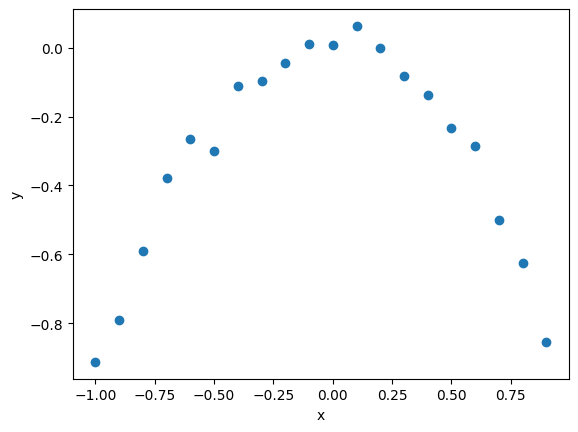

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(0)
x = np.arange(-1,1,0.1) # generate 20 samples
print(x)
y = -x**2 + np.random.normal(0,0.05,len(x))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
# split the dataset into training and test
x_train = x[0:12]
y_train = y[0:12]
x_test = x[12:]
print(x_test)
y_test = y[12:]

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [3]:
# define a function that given the training set and polynomial degree
# return function that represents the math expression of polynomial
# and best fits training data
def polynomial_fit(degree = 1):
    return np.poly1d(np.polyfit(x_train, y_train, degree))

In [4]:
# fuction to plot
def plot_polyfit(degree = 1):
    p = polynomial_fit(degree)
    plt.scatter(x_train,y_train,label = 'Training set')
    plt.scatter(x_test,y_test,label = 'Test set')
    curve_x = np.arange(min(x),max(x),0.01)
    plt.plot(curve_x,p(curve_x),label='Polynomial of degree {}'.format(degree))
    plt.xlim((-1,1))
    plt.ylim(-1,np.max(y)+0.1)
    plt.legend()
    plt.plot()

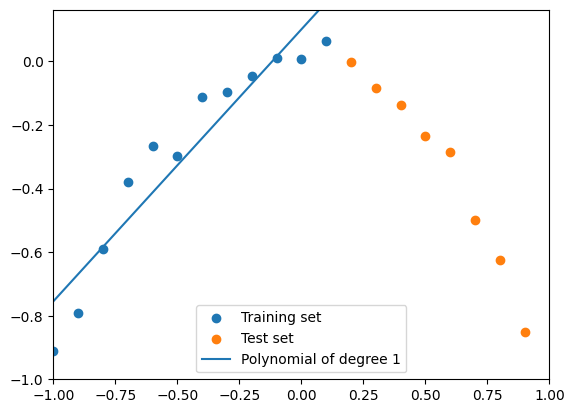

In [5]:
plot_polyfit(1) # polynomial of degree 1


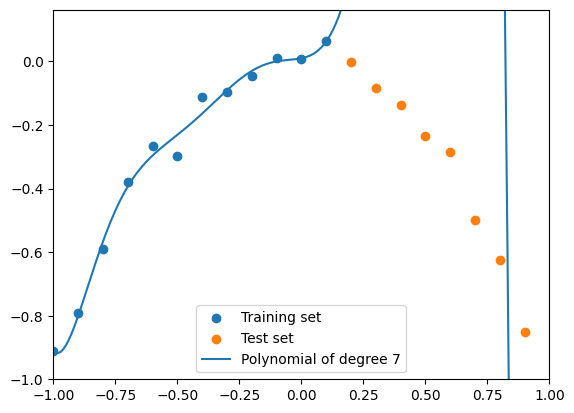

In [6]:
# try a high degree
plot_polyfit(7) # polynomial of degree 7
# it fits better the traning set but completely wrong
# about the test point.

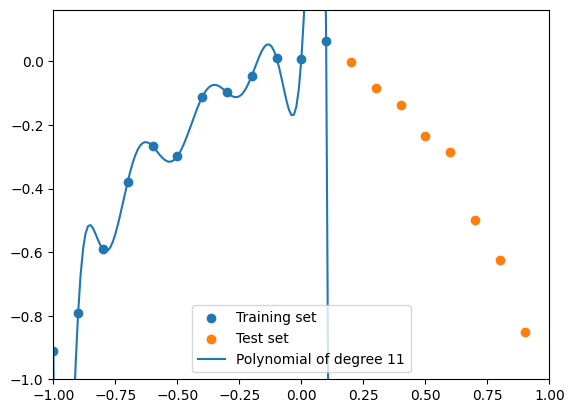

In [7]:
# Overfitting created
# it fits the training data perfectly but
# loses precision (精確) on the test set
plot_polyfit(11) # polynomial of degree 11

### Avoid Overfitting

$$
RMSE = \sqrt{\frac{\sum\limits_{i=1}^N(Predicted_i-Actual_i)^2}{N}}
$$

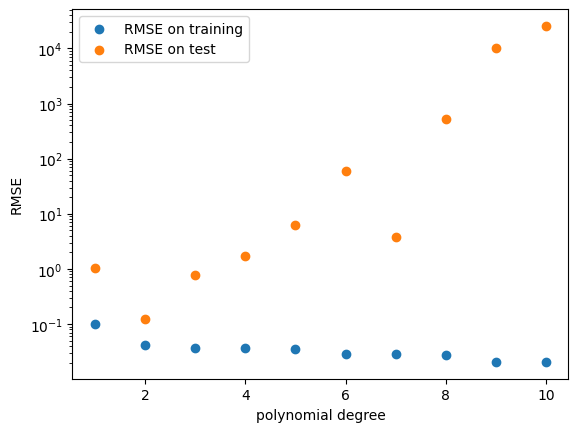

In [10]:
# Measuring the Mean Squared Error
# Loop through all degrees and calculate RMSE for traing and test sets

result = []
for i in range(1,len(x_train)-1):
    p = polynomial_fit(i)
    rmse_training = np.sqrt(mean_squared_error(y_train,p(x_train)))
    rmse_test = np.sqrt(mean_squared_error(y_test,p(x_test)))
    result.append({'degree':i,'rmse_training':rmse_training,
                   'rmse_test':rmse_test})
plt.scatter([x['degree'] for x in result],
            [x['rmse_training'] for x in result],
            label = 'RMSE on training')
plt.scatter([x['degree'] for x in result],
            [x['rmse_test'] for x in result],
            label = 'RMSE on test')
plt.yscale('log')
plt.xlabel('polynomial degree')
plt.ylabel('RMSE') # Root Mean Squared Error
plt.legend()
plt.show()
# we get a lower value of test set RMSE if we choose a polynomial of degree 2

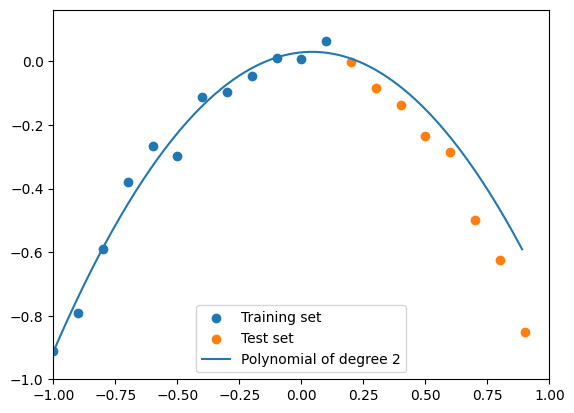

In [11]:
plot_polyfit(2) # polynomial of degree 2